# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Описание данных
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 100

df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

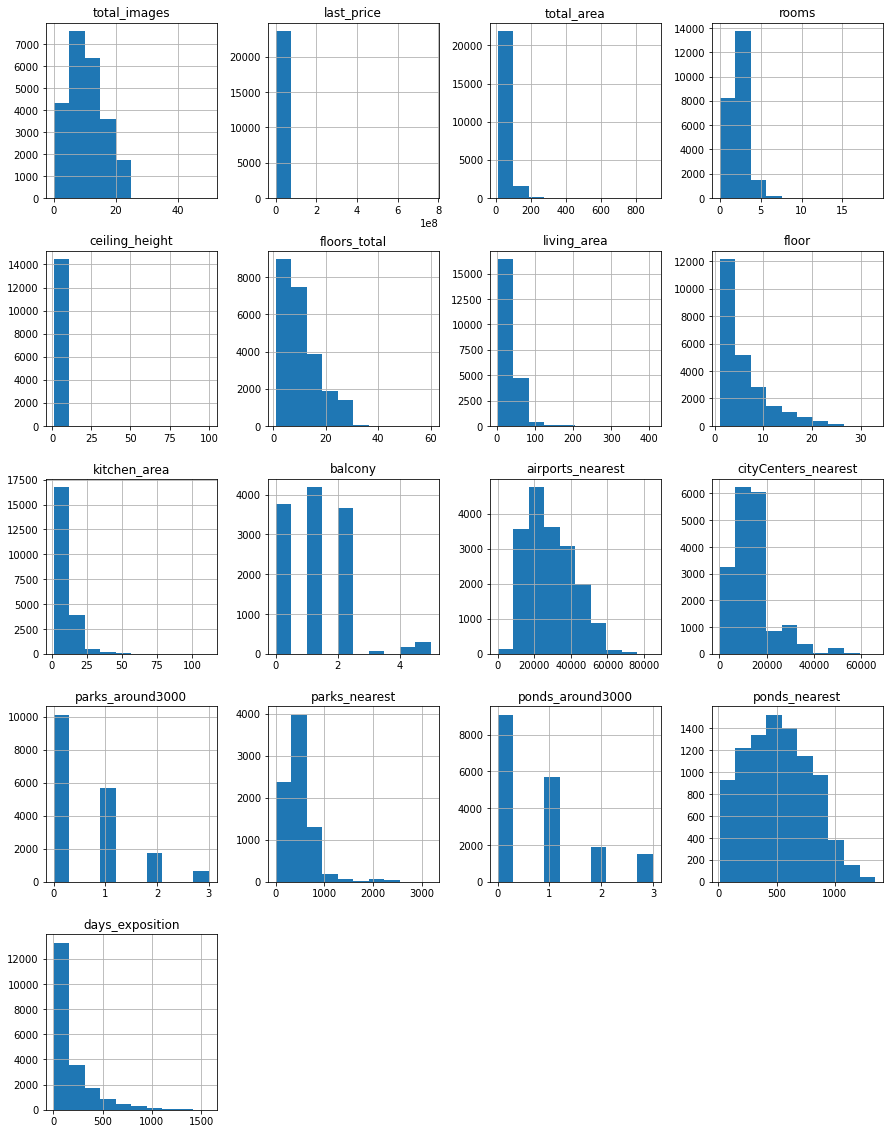

In [4]:
df.hist(figsize=(15, 20))

# Вывод:
В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Гистограммы построены. Информация о данных получена. Приступим к предобработке

</div>


### Выполните предобработку данных

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-1)

**total_images - число фотографий квартиры в объявлении**

In [7]:
df['total_images'].astype('int')

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

**last_price - цена на момент снятия с публикации**

In [8]:
df['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

**total_area - общая площадь квартиры в квадратных метрах (м²)**

In [9]:
df['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

**first_day_exposition - дата публикации**

In [10]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

**ceiling_height - высота потолков**

Замена NaN на медианное значение в ceiling_height

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [13]:
df['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [14]:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее решение👍

</div>


**Пропуски в floors_total - всего этажей в доме**

Заменим на медианные

In [15]:
df['floors_total'] = df['floors_total'].dropna()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Пропусков в столбце floors_total мало - можно сразу удалить их без снижения качества данных
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>

</div>


**is_apartment - аппартаменты**

In [16]:
df['is_apartment'].mean()

0.018018018018018018

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
df['is_apartment'] = df['is_apartment'].astype(bool)

**kitchen_area - площадь кухни**

In [18]:
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Получилось отлично👍

</div>


**balcony - балконы**

In [19]:
# Найдем зависимость столбцов друг от друга при помощи корреляции Пирсона.
print(df.corr().sort_values(by='balcony', ascending=False)['balcony'].head())

balcony         1.000000
floors_total    0.194065
floor           0.168773
total_images    0.121693
kitchen_area    0.081989
Name: balcony, dtype: float64


In [20]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype(int)
 

**locality_name - населенный пункт**

In [21]:
# перевод в строчные буквы
df['locality_name'] = df['locality_name'].str.lower()

# Оставим только названия
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Уникальные значения в алфавитном порядке
set(df['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гости

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**


   Хорошая работа. Также рекомендую хорошую статью по предобработке, в ней есть интересные способы обработки неявных дубликатов: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27 В пункте 8 есть интересная информация о работе с опечатками в названиях населенных пунктов

</div>


В данной колонке 49 пропущенных значений, считаю верным решением их заменить на unknown

In [22]:
df['locality_name'] = df['locality_name'].dropna()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Пропусков в столбце locality_name мало - лучше сразу удалить их, чем заполнять значением, которое не является названием населенного пункта - это может исказить дальнейший анализ
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>
    
</div>


**airports_nearest - расстояние до ближайшего аэропорта (м)**

In [23]:
df['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

Оставим значения неизменным.

**citycenters_nearest - расстояние до центра города (м)**

In [24]:
df['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695       -1.0
23696       -1.0
23697    10364.0
23698       -1.0
Name: city_centers_nearest, Length: 23699, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится не в городе.

Оставим значения неизменным.

**parks_nearest - расстояние до ближайшего парка (м)**

In [25]:
df['parks_nearest'].round(2)

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от парка.

Оставим значения неизменным.

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Исправлено👍

</div>


**ponds_nearest - расстояние до ближайшего водоёма (м)**

In [26]:
df['ponds_nearest'].round(2)

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от водоема.

Оставим значения неизменным.

**days_exposition - сколько дней было размещено объявление (от публикации до снятия)**

Незаполненные пропуски скорее всего, указывают, что объект не продан и хотя присутствующие значения "Количество дней" являются целочисленными оставим пока столбец неизменным.

In [27]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest        0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Вывод:
**основными причинами пропусков могли стать:**
1. Человеческий фактор.
2. Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных)
3. Возможны программные сбои
4. Доработка системы во время её работы (ранее введенные данные не откорректированы)

**В процессе предобработки данных:**
  -  Переименовали название столбца cityCenters_nearest на city_centers_nearest.
  -  Заполнили явные пропуски в таблице, округлили значение до значащих величин.
  -  Изменили тип данных, в соответствии с данными находяшимися в столбцах.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
    Теория обработки пропусков хорошо изложена в статье: https://loginom.ru/blog/missing. Особенно хорошо описаны виды пропусков и их влияние на целесообразность и выбор способа заполнения.
Действительно, решая аналитические задачи, заполнение пропусков может быть необязательно, если объем достоверных данных достаточен для выявления закономерностей, а риск изменить распределение данных существеннен. Не зря в задании просят: "Заполните пропущенные значения там, где это возможно". При ответе на вопросы исследования можно взять только достоверно известные значения, а пропуски проигнорировать, если надежного способа их заполнить нет. 

</div>


### Добавьте в таблицу новые столбцы

In [28]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).astype(int)
df['price_square_meter'].unique()

array([120370,  82920,  92785, ...,  44091, 149511,  41795])

In [29]:
df['day_publication'] = df['first_day_exposition'].dt.weekday 
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

**Добавим столбец month_publication месяц публикации объявления**

In [30]:
df['month_publication'] = df['first_day_exposition'].dt.month 
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

**Добавим столбец year_publication год публикации объявления**

In [31]:
df['year_publication'] = df['first_day_exposition'].dt.year 
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [32]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_apartment_floor'] = df.apply(floor, axis=1) 
df['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [33]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., -0., 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25., 66., 47., 40., 57., 37., 41., 43., 48., 62.,
       60., 39., 42., 65., 54., 59., 45., 61., 63.])

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно

</div>


### Проведите исследовательский анализ данных

# Анализ общей площади


In [34]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

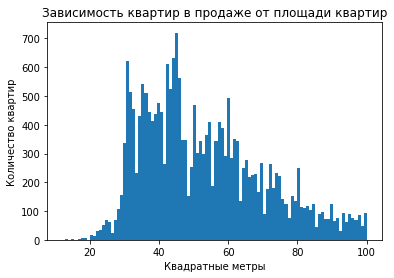

In [35]:
plt.hist(df['total_area'], bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

# Анализ жилой площади

In [36]:
df['living_area'].describe()

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

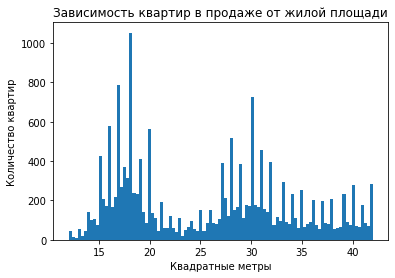

In [37]:
plt.hist(df['living_area'], bins=100, range=(12,42))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.

# Анализ площади кухни

In [38]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.506288
std          6.040000
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

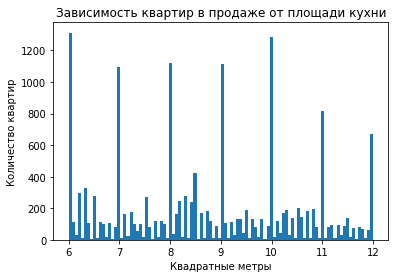

In [39]:
plt.hist(df['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.

# Анализ цены

In [40]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

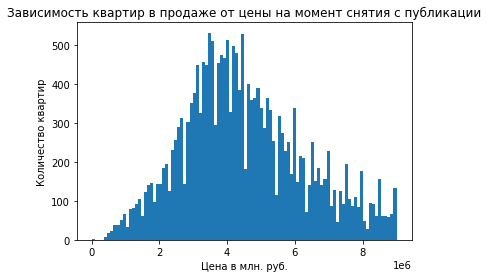

In [41]:
plt.hist(df['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()


**Вывод:**

Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.

# Количество комнат

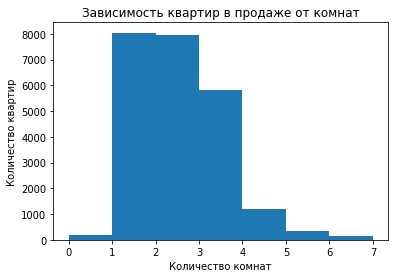

In [42]:
plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.

# Высота потолков

In [43]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

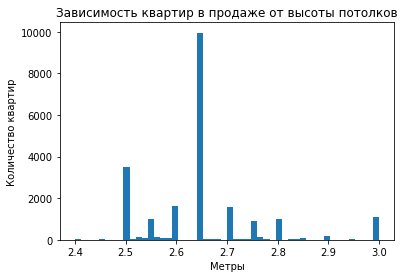

In [44]:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()


**Вывод:**

Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.

# Тип этажа квартиры («первый», «последний», «другой»)

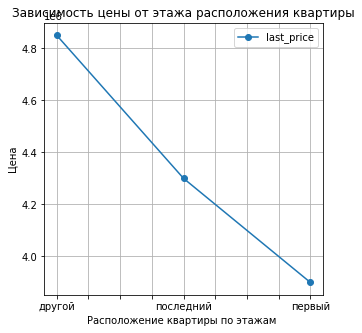

In [45]:
(
    df.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

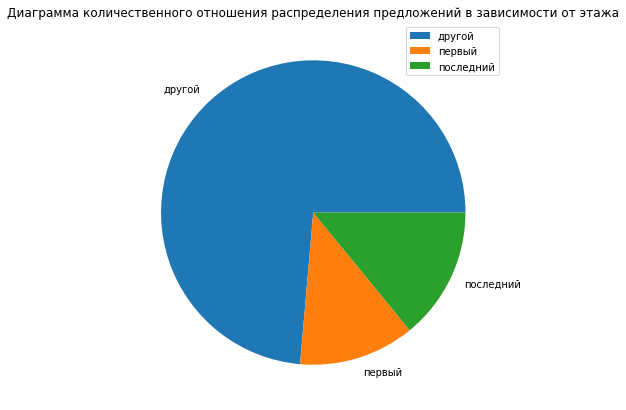

In [46]:
df.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

**Вывод:**

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди хотят сьехать с этих этажей.

# Общее количество этажей в доме

In [47]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

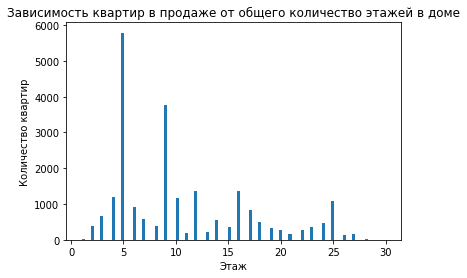

In [48]:
plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.

# Расстояние до центра города в метрах

In [49]:
df['city_centers_nearest'].describe()

count    23699.000000
mean     10886.194017
std       9634.876850
min         -1.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

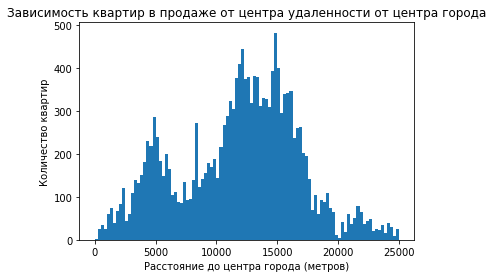

In [50]:
plt.hist(df['city_centers_nearest'], bins=100, range=(0,25000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)), и значительным всплеском на расстоянии в 5000 метров от центра города.

# Расстояние до ближайшего парка

In [51]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

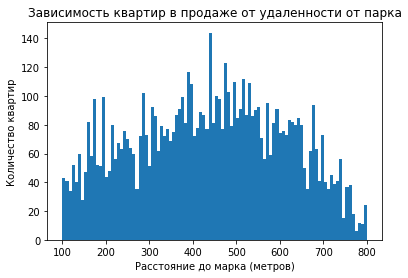

In [52]:
plt.hist(df['parks_nearest'], bins=100, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.

# Общий вывод по разделу:

1. На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.
2. Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра. 
3. Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.
4. Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.
5. Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.
6. Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.
7. Менее ценными считаются квартиры на "первом" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества, значит люди хотят сьехать с этих этажей.
8. Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
9. Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров), и значительным всплеском на расстоянии в 5000 метров от центра города.
10. Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.
**В заключении:** Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. отцентра города.

 <div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Хороший результат. Хочу добавить, что обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.

Могу посоветовать на будущее хорошую статью по оформлению графиков:
    https://devpractice.ru/matplotlib-lesson-3-3-text-elements/



</div>

# Изучаем, как быстро продавались квартиры

In [53]:
print('Расчитаем показатели')
print(df['days_exposition'].describe())

Расчитаем показатели
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


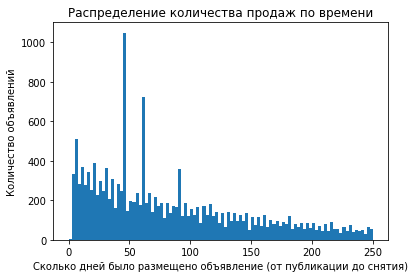

In [54]:
plt.hist(df['days_exposition'], bins=100, range=(0,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод по времение продажи квартир**

Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбрасов и нестандартных значений.

В среднем продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов(площади, цены, удалённости от центра).

Быстрыми продажами можно считать продажи состоявшиеся за 45 днней (в первом квартиле), а необычно долгие продажи после 232 дня и более (после 3 квартиля), которые вообще могут быть не проданными.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
      На гистограмме действительно заметны пики примерно через 45, 60 и 90 дней после начала продажи. Можно посмотреть на условия размещения объявлений в Яндекс.Недвижимости - https://yandex.ru/support/realty/owner/home/add-ads-housing.html С учетом того, что после формирования датасета правила размещения поменялись, эти пики являются следами автоматического снятия объявлений - поэтому оценивать скорость продажи стоит действительно по диаграмме размаха




</div>


# Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [55]:
index = df.index 
price_rooms_area_corr = df.pivot_table(index=index, values=['total_area','rooms', 'price_square_meter'], aggfunc='mean')
price_rooms_area_corr.corr()

,price_square_meter,rooms,total_area
price_square_meter,1.000000,0.055419,0.301960
rooms,0.055419,1.000000,0.758344
total_area,0.301960,0.758344,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

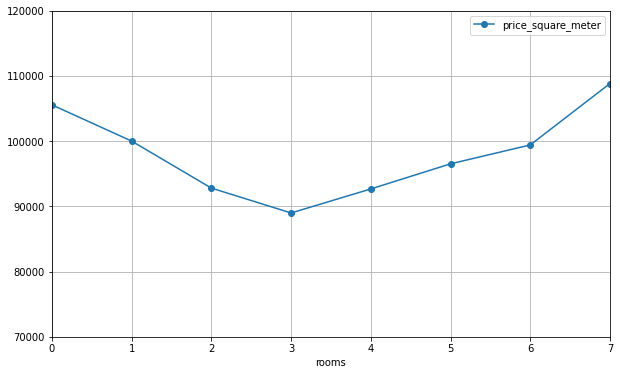

In [56]:
df.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').plot(grid=True, xlim=(0,7),ylim=(70000, 120000), style='o-', figsize=(10, 6))
plt.show

<AxesSubplot:xlabel='rooms', ylabel='price_square_meter'>

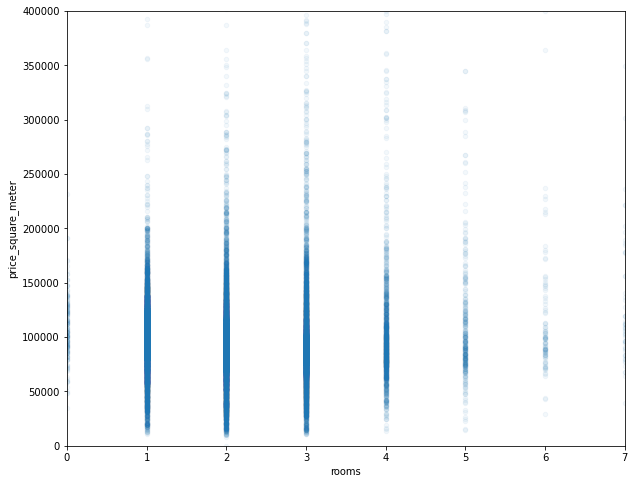

In [57]:
df.plot(y='price_square_meter', x='rooms',xlim = (0,7), kind='scatter',ylim = (0, 400000), alpha=0.05, figsize=(10,8))

 -  Добавил график линейной зависимости, где стало видно, что с ростом числа комнат падает и цена за кв.м.

<AxesSubplot:xlabel='total_area', ylabel='price_square_meter'>

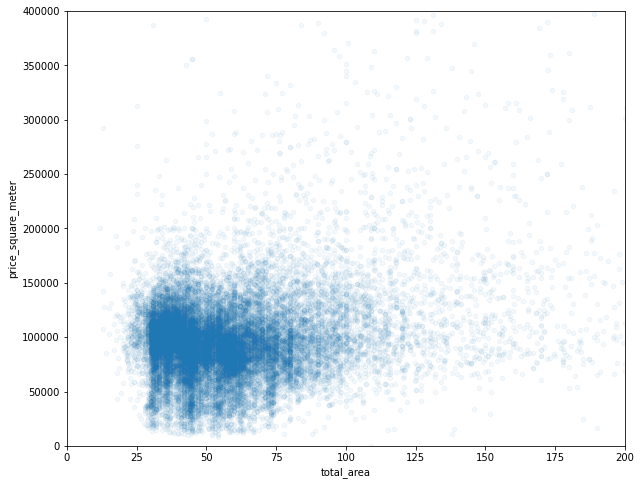

In [58]:
df.plot(y='price_square_meter', x='total_area',xlim = (0,200), kind='scatter',ylim = (0, 400000), alpha=0.05, figsize=(10,8))

**Видим, что стоимость средне зависит от общей площади, и в меньшей степени от количества комнат. Как наблюдение - больше всего в таблице зависимость между количеством комнат и площадью, что достаточно логично.
Тем не менее, с увеличением количества комнат цена за кв.м падает. А если рассматриваем общую площадь, то стоимость за квадратный метр падает с каждым метром при увеличении площади после 60 кв.м**

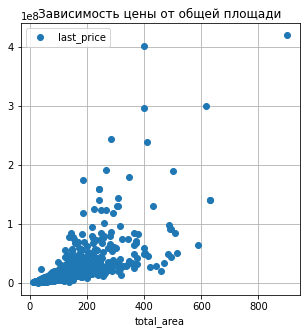

In [59]:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

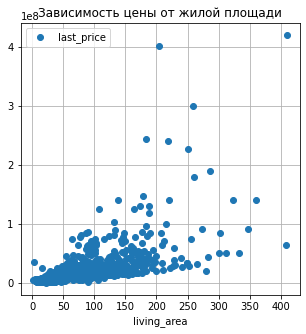

In [60]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()


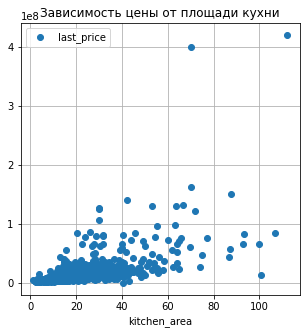

In [61]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()


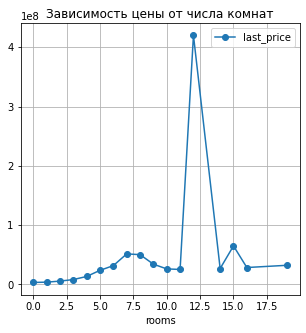

In [62]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()


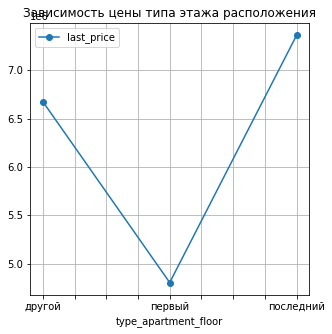

In [63]:
(
    df.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**

   Хорошие результаты. Отмечу, что скорее всего, низкую цену на квартиры на первом и последнем этажах можно аргументировать плохими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой.

</div>

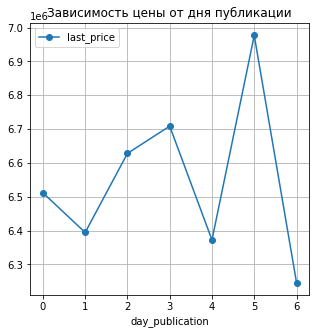

In [64]:
(
    df.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()


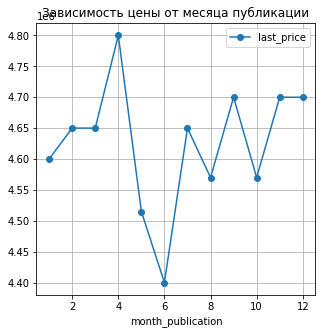

In [65]:
(
    df.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()


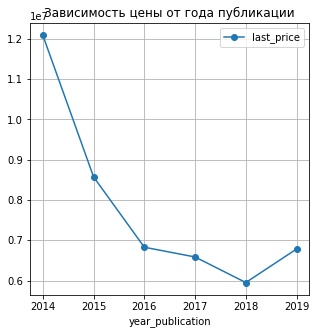

In [66]:
(
    df.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()


**Вывод**

**Предворительные выводы подтвердились:**

- Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.

- Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

- Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [67]:
price_sm_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sm_name.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,15721,114848.57
пушкин,369,103125.37
кудрово,472,95324.48
парголово,327,90175.49
мурино,590,86087.06
шушары,440,78676.90
колпино,338,75424.15
гатчина,307,68745.69
всеволожск,398,68654.01


**Вывод:**

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также не большой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Верно

</div>


# Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [68]:
df.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    15721.000000
mean        11.551046
std          4.907395
min         -0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

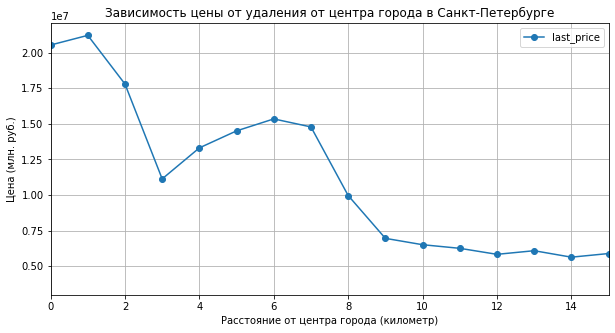

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
-0.0,2.052746e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


In [69]:
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
df.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

<AxesSubplot:xlabel='city_centers_nearest'>

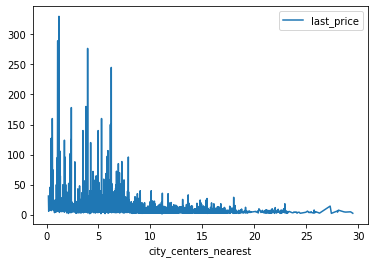

In [70]:
flats_in_spb = df.query('locality_name == "санкт-петербург"')
flats_in_spb = flats_in_spb.query('city_centers_nearest != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['locality_name', 'city_centers_nearest','last_price']]

flats_in_spb_price['last_price'] = flats_in_spb_price['last_price'] / 1000000
flats_in_spb_price['city_centers_nearest'] = flats_in_spb_price['city_centers_nearest'] / 1000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='city_centers_nearest', values='last_price', aggfunc=('mean'))
flats_in_spb_pivot.plot()

**Вывод**

Начиная с третьего километра цена сильно падает. С 4 по 7 километры наблюдается колебание стоимости и дальше снова падение цен. Будем считать центром километры с 0 по 7 включительно. Чем дальше от центра, тем дешевле жить, что вполне логично

<div class="alert alert-success">
✔️ Комментарий ревьюера v3✔️

Верно. На графике после 7 км заметно, что цена меняется. Это возможный центр города.

Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2

</div>

### Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:

1. Изучили общую информацию о данных
- В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.
2. Выполнена предобработка данных
- Переименовали название столбца cityCenters_nearest на city_centers_nearest.
- Заполнили явные пропуски в таблице, округлили значение до значащих величин.
- Изменили тип данных, в соответствии с данными находящимися в столбцах.
- Сделали вывод о причинах появления пропусков: 
  -  Человеческий фактор.
  -  Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных).
  -  Возможны программные сбои.
  -  Доработка системы во время её работы (ранее введенные данные не откорректированы)
3. Добавлены новые столбцы в таблицу для проведения следующего этапа
- price_square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой.
- day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
- month_publication - месяц публикации объявления.
- year_publication - год публикации объявления.
- type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
- distance_city_center - расстояние до центра города в целых километрах.
4. Проведен исследовательский анализ данных
- Изучены и описаны параметры
  - Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. или 5 км. от центра города.
- Изучено, как быстро продавались квартиры
  -  Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
  -  В среднем продажа средне статистической квартиры занимает 2-3 месяца в зависимости от сопутствующих факторов(площади, цены, удалённости от центра).
  -  Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи после 232 дня и более (после 3 квартиля), которые могут совсем не продаваться.
- Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта
  -  Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
  -  Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
  -  Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
  -  Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
- Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга
  -  Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от удаления.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Матвей, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Матвей, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.